In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
from scipy import stats

EJERCICIO 1

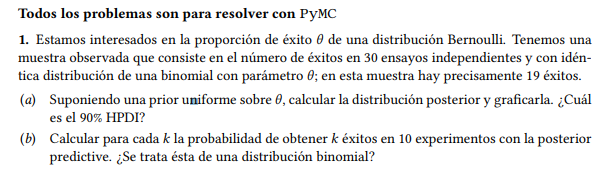

In [156]:
exitos = 19
trials = 30

with pm.Model() as binomial_model:
    theta = pm.Uniform('theta', 0, 1)
    y = pm.Binomial('y', n = trials, p = theta, observed = exitos)
    trace = pm.sample(1000, tune = 1000)


# with pm.Model() as binomial_model:
#     theta = pm.Normal('theta', mu = .5, sigma = .1)
#     y = pm.Binomial('y', n = trials, p = theta, observed = exitos)
#     trace = pm.sample(1000, tune = 1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


<Axes: title={'center': 'theta'}>

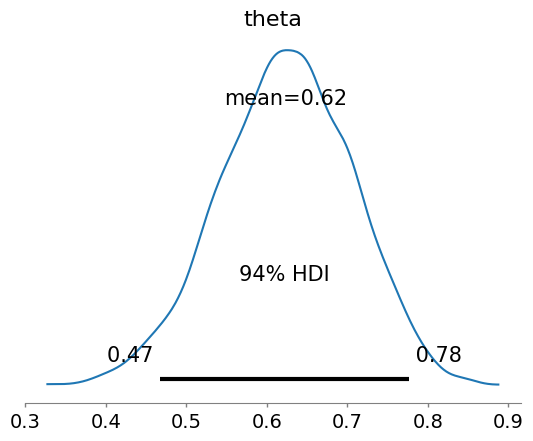

In [157]:
az.plot_posterior(trace)

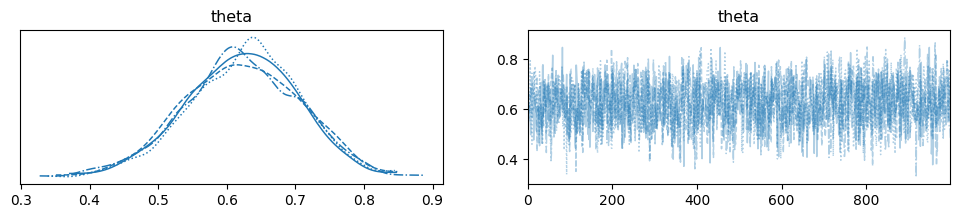

In [158]:
az.plot_trace(trace)
plt.show()

In [159]:
thetas = trace.posterior.theta.values.flatten()

In [160]:
hdis = az.hdi( thetas , hdi_prob = .9)
print(hdis)

[0.49381463 0.76453286]


(array([0.0005 , 0.00325, 0.01275, 0.0445 , 0.09575, 0.16625, 0.2175 ,
        0.2195 , 0.14675, 0.09325]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

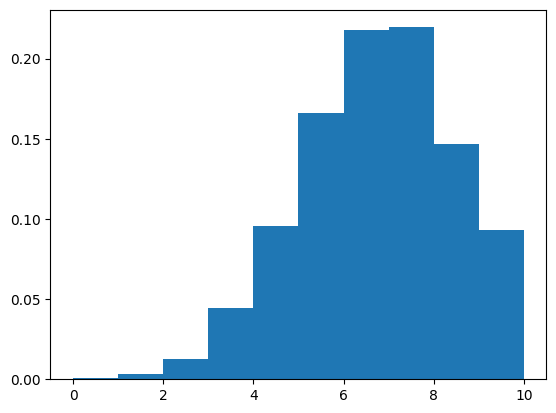

In [161]:
#B)

# pónele quie queiro sacar una nueva muestra con la info que ahora tengo de theta

results = np.random.binomial(n = 10, p = thetas, size = len(thetas))

#en el luhar result[i] tenfo la cantidad de exitos de un sensayo con theta[i]

plt.hist(results, density = True)

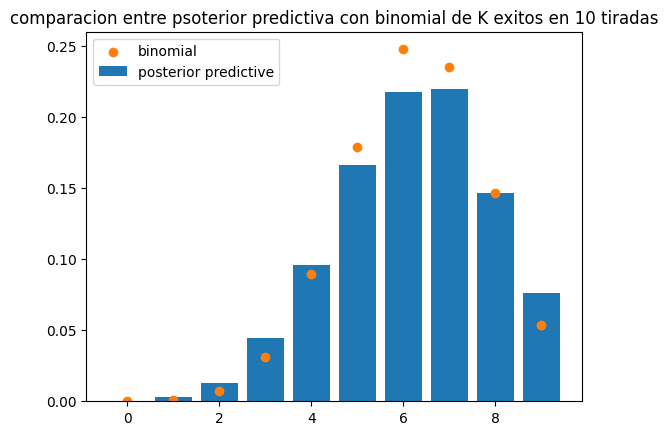

In [162]:
ks = np.arange(10)

density = [sum(results == k)/ 4000 for k in ks]
binom = stats.binom.pmf(ks,10,np.percentile(thetas,50))


plt.bar(ks, density, label = "posterior predictive")
plt.scatter(ks, binom, label = "binomial")
plt.legend()
plt.title("comparacion entre psoterior predictiva con binomial de K exitos en 10 tiradas")

plt.show()



EJERCICIO 2

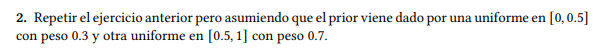

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymc\distributions\mixture.py:477: MixtureTransformWarning: No safe default transform found for Mixture distribution theta. This can happen when components have different supports or default transforms.
If appropriate, you can specify a custom transform for more efficient sampling.
  transform_warning()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytensor\scalar\basic.py:2937: RuntimeWarning: invalid value encountered in log
  return np.log(x)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytensor\scalar\basic.py:2937: RuntimeWarning: divide by zero encountered in log
  return np.log(

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


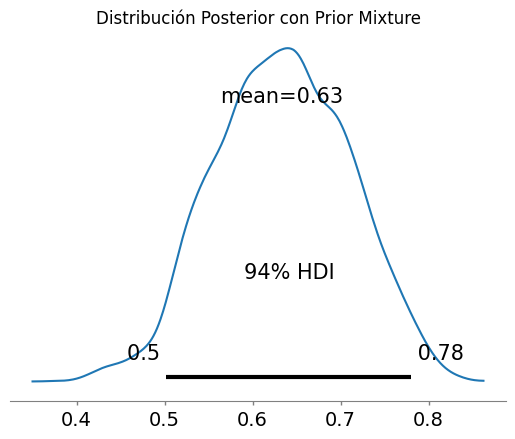

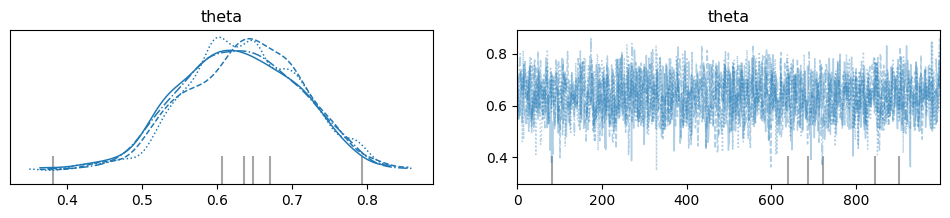

[0.51338637 0.76097701]


In [171]:
with pm.Model() as model_mixture:
    theta = pm.Mixture('theta', w=[0.3, 0.7], comp_dists=[
        pm.Uniform.dist(0, 0.5),
        pm.Uniform.dist(0.5, 1)
    ])
    y = pm.Binomial('y', n=trials, p=theta, observed=exitos)
    trace_mixture = pm.sample(1000, tune=1000, return_inferencedata=True)

az.plot_posterior(trace_mixture, var_names=['theta'])
plt.title('Distribución Posterior con Prior Mixture')
plt.show()

az.plot_trace(trace_mixture)
plt.show()

thetas = trace_mixture.posterior.theta.values.flatten()
hdis = az.hdi(thetas , hdi_prob = .9)
print(hdis)

(array([0.00083333, 0.01      , 0.04138889, 0.10666667, 0.1775    ,
        0.24333333, 0.25472222, 0.17444444, 0.08472222, 0.0175    ]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

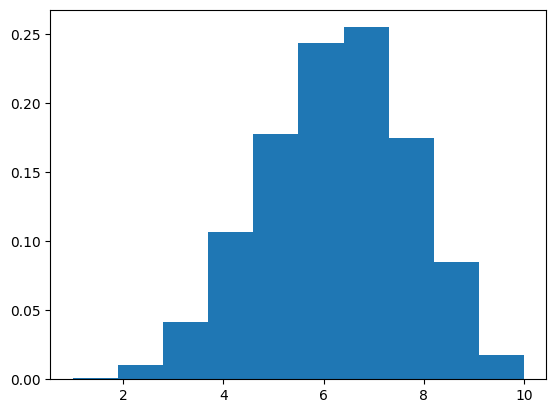

In [172]:
results = np.random.binomial(n = 10, p = thetas, size = len(thetas))
plt.hist(results, density = True)

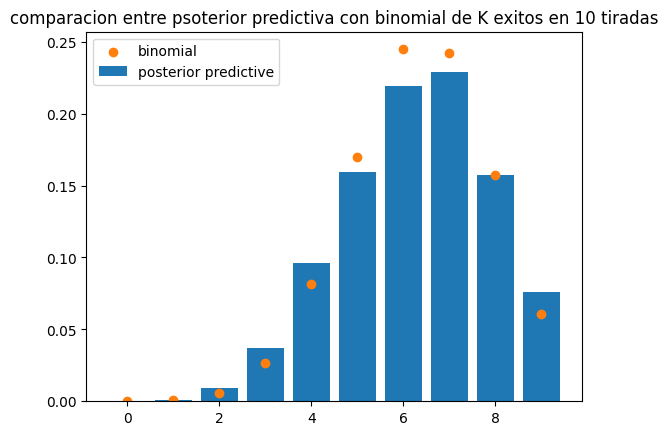

In [173]:
ks = np.arange(10)

density = [sum(results == k)/ 4000 for k in ks]
binom = stats.binom.pmf(ks,10,np.percentile(thetas,50))

plt.bar(ks, density, label = "posterior predictive")
plt.scatter(ks, binom, label = "binomial")
plt.legend()
plt.title("comparacion entre psoterior predictiva con binomial de K exitos en 10 tiradas")

plt.show()


EJERCICIO 3

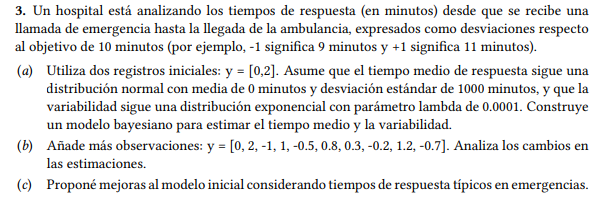

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


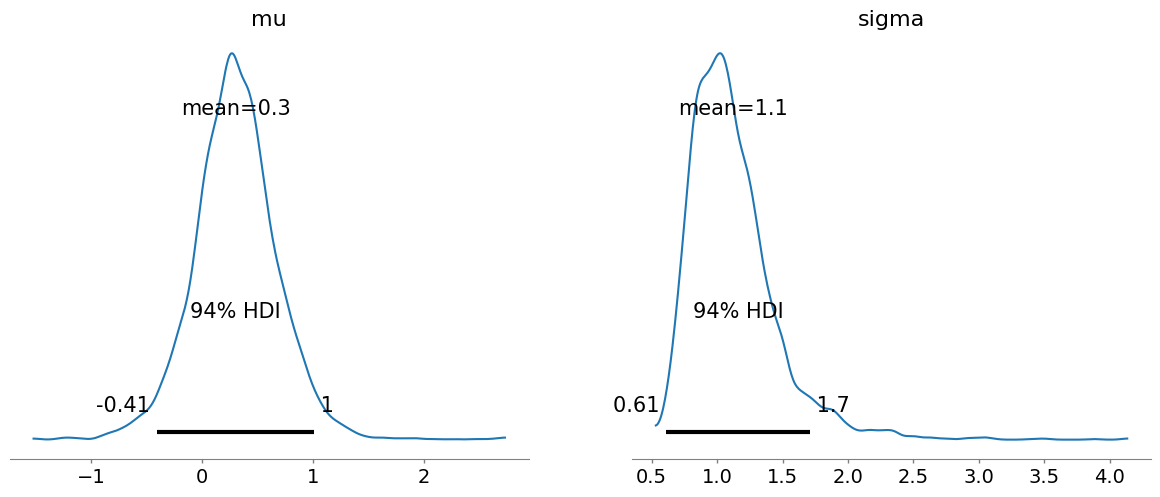

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.303  0.380  -0.411    1.004      0.008    0.009    2507.0    2098.0   
sigma  1.123  0.336   0.611    1.709      0.008    0.006    2148.0    1531.0   

       r_hat  
mu       1.0  
sigma    1.0  


In [174]:
# y = [0,2]
y = [0, 2, -1, 1, -0.5, 0.8, 0.3, -0.2, 1.2, -0.7]

with pm.Model() as model_initial:
    mu = pm.Normal('mu', mu=0, sigma=1000)
    sigma = pm.Exponential('sigma', lam=0.0001)
    
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y) #lh
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

az.plot_posterior(trace)
plt.show()

print(az.summary(trace))


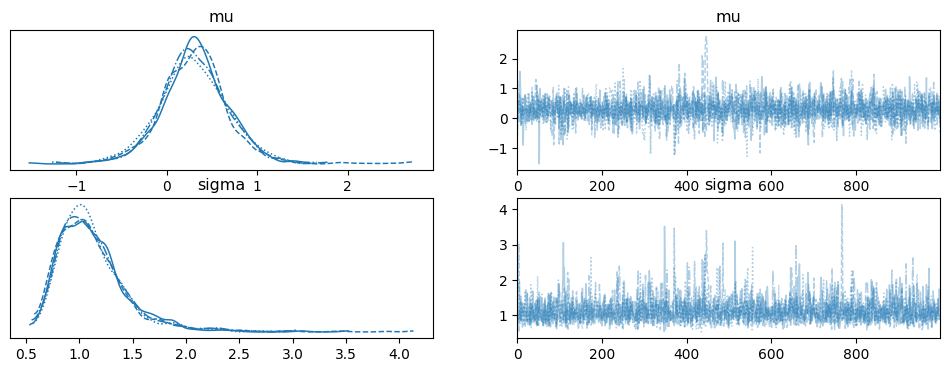

In [175]:
az.plot_trace(trace)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


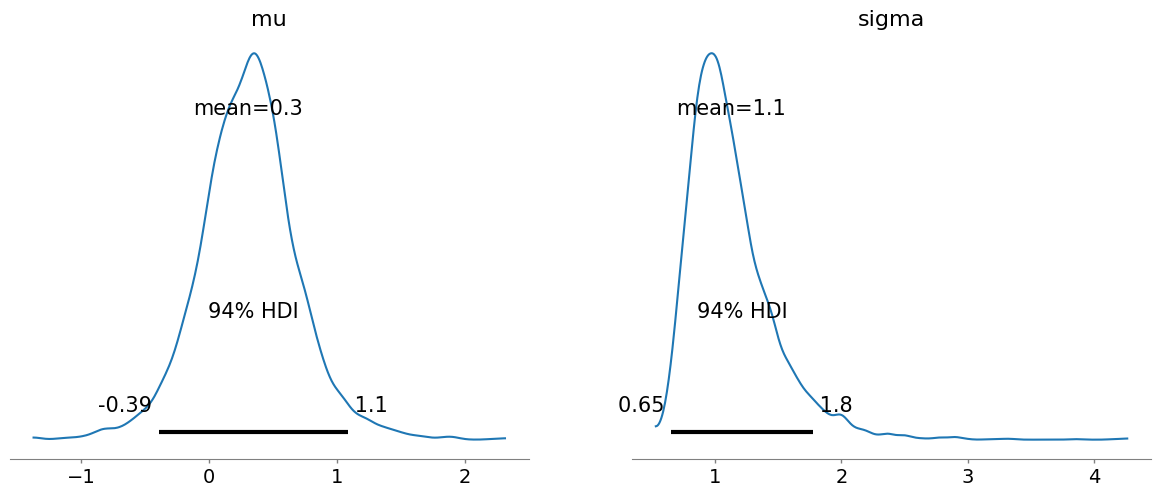

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.305  0.387  -0.391    1.084      0.009    0.007    2135.0    1689.0   
sigma  1.130  0.346   0.649    1.778      0.009    0.006    1933.0    1742.0   

       r_hat  
mu       1.0  
sigma    1.0  


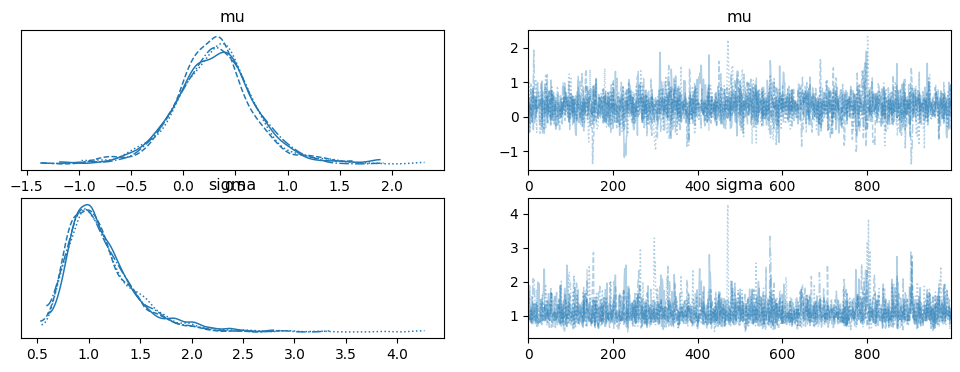

In [176]:
# prop model

with pm.Model() as prop:
    mu = pm.Normal('mu', mu=10, sigma=10)
    sigma = pm.Exponential('sigma', lam=0.01)
    
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y) #lh
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

az.plot_posterior(trace)
plt.show()

print(az.summary(trace))

az.plot_trace(trace)
plt.show()



EJERCICIO 4

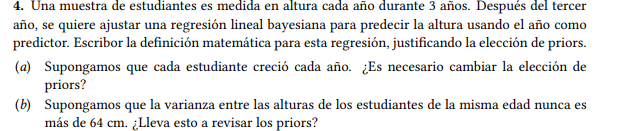

In [179]:
N = 50 # numero de alumnos
X = np.random.randint(1, 3, N)
e = np.random.normal(0, 1, N)

Y = 2*X + 145 + e

with pm.Model() as model3:
    variance = pm.HalfNormal("variance", sigma=8) # error variance, HalfCauchy for std.
    slope = pm.HalfNormal("slope", sigma=10**2) # slope
    intercept = pm.Normal("intercept", mu=120, sigma=20) # intercept #por lo de la varianza

    # linear model
    mu = slope * X + intercept

    # likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=variance**0.5, observed=Y)

with model3:
    trace = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [variance, slope, intercept]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.


In [180]:
with pm.Model() as model:
    # Priors informativos basados en el conocimiento de que los estudiantes crecen cada año
    beta_0 = pm.Normal('beta_0', mu=140, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=5, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=8)  # Prior uniforme para la desviación estándar (0 a 8 cm)

    # Modelo lineal
    mu = beta_0 + beta_1 * X

    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=Y)

    # Muestreo
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


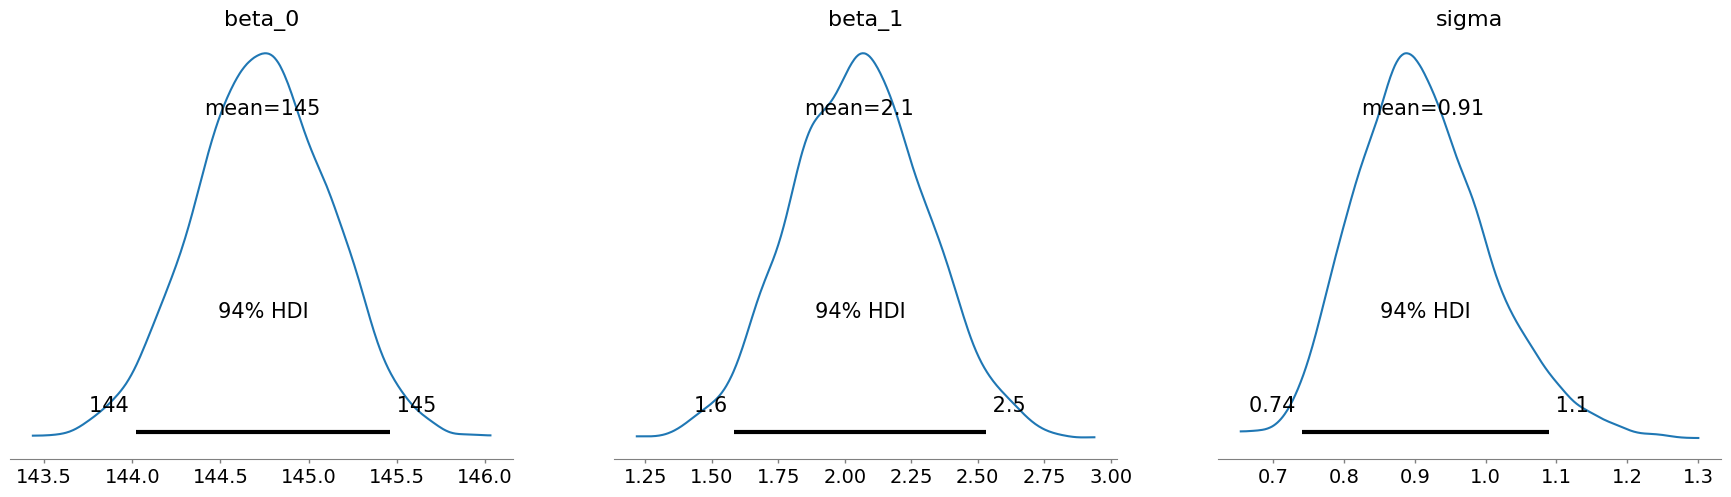

           mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_0  144.736  0.387  144.019  145.462      0.011    0.008    1136.0   
beta_1    2.054  0.255    1.585    2.531      0.008    0.005    1140.0   
sigma     0.911  0.095    0.740    1.090      0.002    0.002    1988.0   

        ess_tail  r_hat  
beta_0    1156.0    1.0  
beta_1    1427.0    1.0  
sigma     1954.0    1.0  


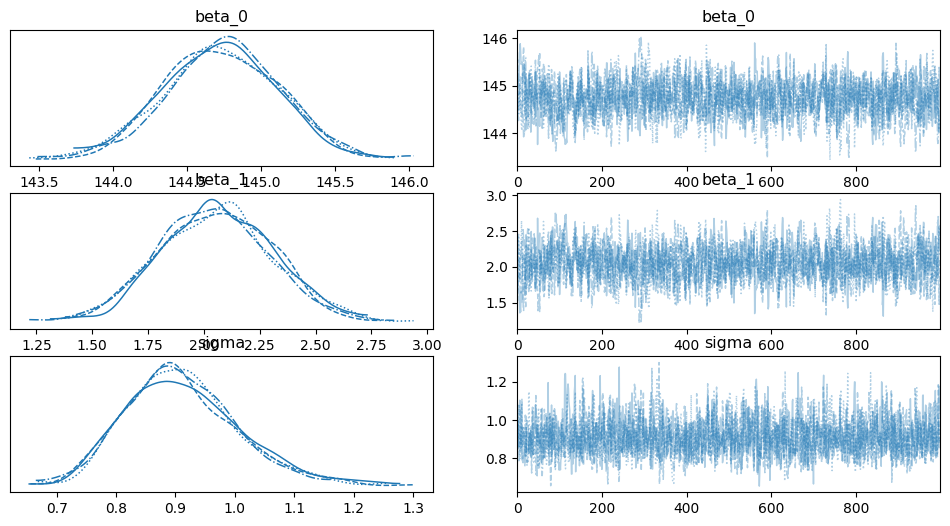

In [181]:
az.plot_posterior(trace)
plt.show()

print(az.summary(trace))

az.plot_trace(trace)
plt.show()


EJERCICIO 5

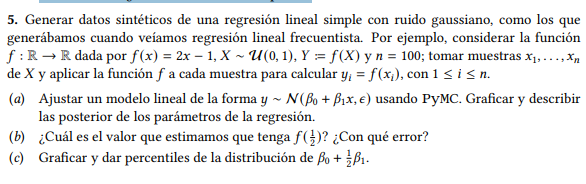

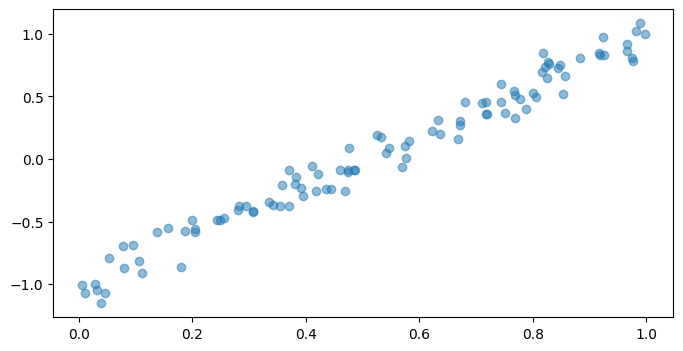

In [182]:
n = 100
X = np.random.uniform(0, 1, n)
Y = 2 * X - 1
Y = Y + np.random.normal(0, 0.1, 100)

plt.figure(figsize=(8, 4))
plt.scatter(X, Y, alpha=0.5, label='datos generados')

In [183]:
with pm.Model() as modelo:
    beta0 = pm.Normal('beta0', mu=0, sigma=10) #no informativo
    beta1 = pm.Normal('beta1', mu=0, sigma=10) #no informativo
    sigma = pm.HalfNormal('sigma', sigma=1)

    mu = beta0 + beta1 * X
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 81 seconds.



Estadísticas resumen:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta0 -1.013  0.021  -1.053   -0.974      0.000      0.0    3287.0    3744.0   
beta1  1.996  0.035   1.928    2.059      0.001      0.0    3226.0    3380.0   
sigma  0.101  0.007   0.088    0.115      0.000      0.0    3952.0    4475.0   

       r_hat  
beta0    1.0  
beta1    1.0  
sigma    1.0

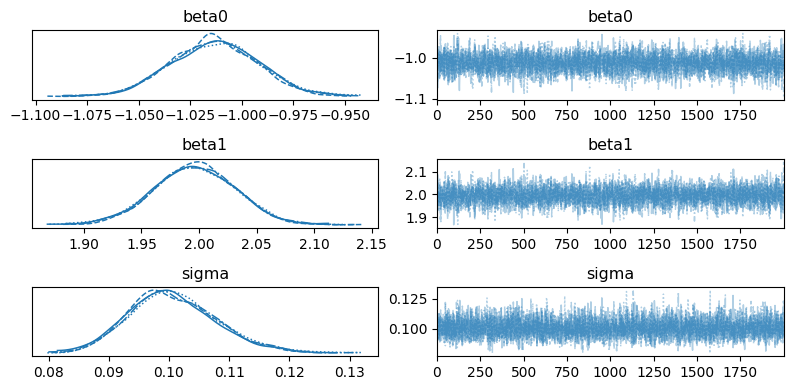

In [184]:
az.plot_trace(trace,figsize= (8,4))
plt.tight_layout()

summary = az.summary(trace)
print("\nEstadísticas resumen:")
summary


Predicción para f(1/2): -0.015 ± 0.010


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([-0.06333509, -0.05466066, -0.04598623, -0.0373118 , -0.02863737,
        -0.01996293, -0.0112885 , -0.00261407,  0.00606036,  0.01473479,
         0.02340922]),
 <a list of 2000 BarContainer objects>)

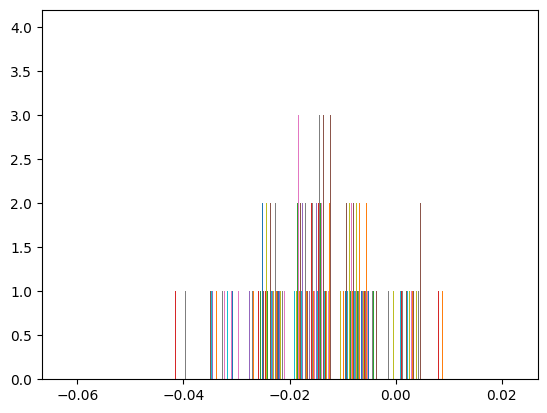

In [185]:
#CALCULO F(.5)

# Calcular f(1/2)
x = 0.5
#tiene las muestras a de las distribuciones posterioes
posterior_samples = trace.posterior
f_medio = posterior_samples['beta0'].values + x * posterior_samples['beta1'].values

# posterior_samples['beta0'].values son todas las distribuciones posibles de beta0
# f_medio es una volsa de valores medios, donde los que tienen mas probabilidad van a estar mas veces 

#media y el error
valor_medio = float(np.mean(f_medio))
error = float(np.std(f_medio))

print(f"\nPredicción para f(1/2): {valor_medio:.3f} ± {error:.3f}")

plt.hist(f_medio)

In [186]:
#c)

percentiles = np.percentile(f_medio, [2.5, 25, 50, 75, 97.5])
print("\nPercentiles de β₀ + 0.5β₁:")
print(f"2.5%: {percentiles[0]:.3f}")
print(f"25%:  {percentiles[1]:.3f}")
print(f"50%:  {percentiles[2]:.3f}")
print(f"75%:  {percentiles[3]:.3f}")
print(f"97.5%:{percentiles[4]:.3f}")


Percentiles de β₀ + 0.5β₁:
2.5%: -0.035
25%:  -0.022
50%:  -0.015
75%:  -0.009
97.5%:0.005


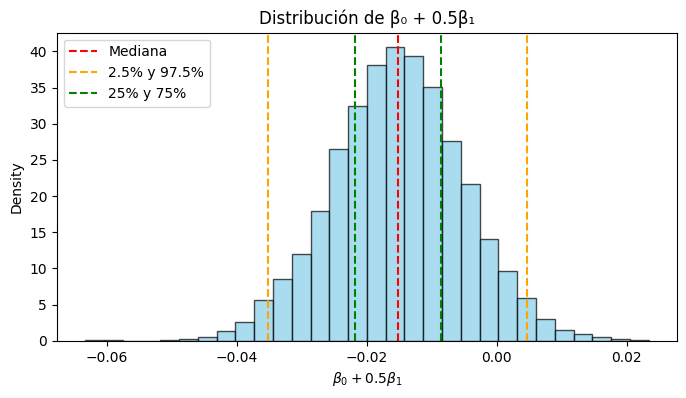

In [187]:
f_medio = np.array(f_medio).flatten()

# Graficar la distribución de β₀ + 0.5β₁
plt.figure(figsize=(8, 4))
plt.hist(f_medio, bins=30, density=True, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(percentiles[2], color="red", linestyle="--", label="Mediana")
plt.axvline(percentiles[0], color="orange", linestyle="--", label="2.5% y 97.5%")
plt.axvline(percentiles[4], color="orange", linestyle="--")
plt.axvline(percentiles[1], color="green", linestyle="--", label="25% y 75%")
plt.axvline(percentiles[3], color="green", linestyle="--")
plt.xlabel(r"$\beta_0 + 0.5 \beta_1$")
plt.ylabel("Density")
plt.title("Distribución de β₀ + 0.5β₁")
plt.legend()
plt.show()


EKERCICIO 6

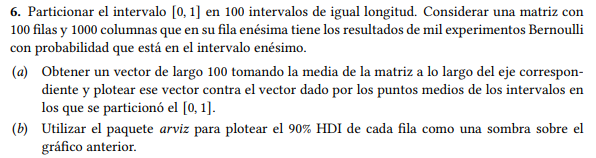

In [188]:
# intervalos = np.linspace(0, 1, 101)
# puntos_medios = (intervalos[:-1] + intervalos[1:]) / 2

# resultados = np.array([np.random.binomial(1, p, 1000) for p in puntos_medios])

# medias = np.mean(resultados, axis=1)

# plt.plot(puntos_medios, medias, label='Media de experimentos Bernoulli')
# plt.xlabel('Puntos medios de los intervalos')
# plt.ylabel('Media')
# plt.title('Media de experimentos Bernoulli vs Puntos medios de los intervalos')
# plt.legend()
# plt.show()

In [189]:
# hdi = az.hdi(resultados, hdi_prob=0.9)  # Calcula el 90% HDI a lo largo del eje de columnas

# # Graficar el HDI como una banda de sombra alrededor de la media
# plt.fill_between(puntos_medios, hdi[:, 0], hdi[:, 1], color='gray', alpha=0.5, label="90% HDI")

# # Configuración final del gráfico
# plt.xlabel("Probabilidad (punto medio del intervalo)")
# plt.ylabel("Media de los experimentos Bernoulli")
# plt.legend()
# plt.show()


EJERCICIO 7

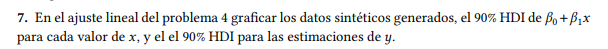

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6320\383285758.py:24: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.9) # HDI para la línea de regresión
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6320\383285758.py:25: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_obs_hdi = az.hdi(y_obs_samples, hdi_prob=0.9) # HDI para las observaciones


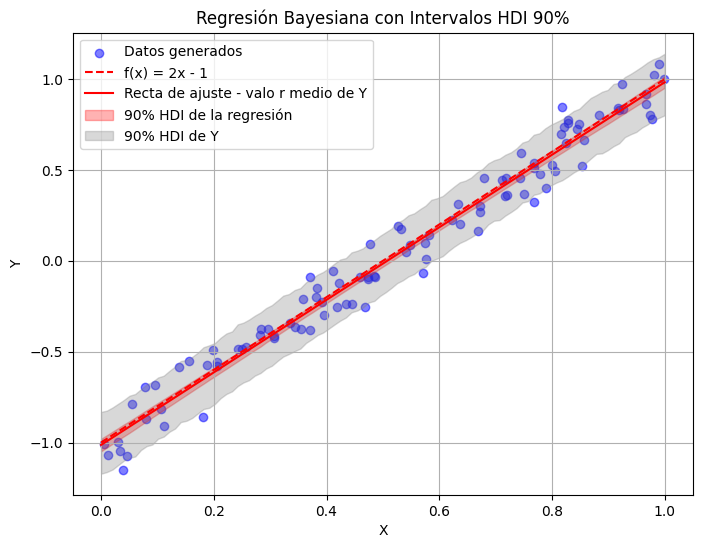


Estadísticas resumen (HDI 90%):


mean     sd  hdi_5%  hdi_95%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta0 -1.013  0.021  -1.049   -0.980      0.000      0.0    3287.0    3744.0   
beta1  1.996  0.035   1.942    2.056      0.001      0.0    3226.0    3380.0   
sigma  0.101  0.007   0.089    0.113      0.000      0.0    3952.0    4475.0   

       r_hat  
beta0    1.0  
beta1    1.0  
sigma    1.0

In [190]:
#creo 100 puntos
x_pred = np.linspace(0, 1, 100)

#extraigo muestras generadas del modelo
posterior_samples = trace.posterior
beta0_samples = posterior_samples['beta0'].values.flatten()
beta1_samples = posterior_samples['beta1'].values.flatten()
sigma_samples = posterior_samples['sigma'].values.flatten()

y_pred_samples = np.zeros((len(beta0_samples), len(x_pred)))
y_obs_samples = np.zeros((len(beta0_samples), len(x_pred)))

for i in range(len(beta0_samples)):
    # mu = (β₀ + β₁x)
    #agarro el valor i de b0 y b1 y construyo una recta; me da recta para mu
    y_pred_samples[i] = beta0_samples[i] + beta1_samples[i] * x_pred #array donde cada fila representa elñ y para cada x
    # y ∼ N(mu, sigma)
    #cosntuyo una mormal con mu el valor de la recta que ya calcule y sigma el i de los valores que tengo
    y_obs_samples[i] = np.random.normal(y_pred_samples[i], sigma_samples[i], len(x_pred)) #almaceno predicciones de i que incluyen el error

#con esto obtengo muestras de la distribucion de Y

# calcular HDI
y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.9) # HDI para la línea de regresión
y_obs_hdi = az.hdi(y_obs_samples, hdi_prob=0.9) # HDI para las observaciones

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, label='Datos generados', color="blue")
plt.plot(x_pred, 2 * x_pred - 1, 'r--', label='f(x) = 2x - 1')

plt.plot(x_pred, np.mean(y_pred_samples, axis=0), color="red", label="Recta de ajuste - valo r medio de Y")
plt.fill_between(x_pred, y_pred_hdi[:, 0], y_pred_hdi[:, 1], color="red", alpha=0.3, label="90% HDI de la regresión")


# HDI 90% para las predicciones
plt.fill_between(x_pred,y_obs_hdi[:, 0],y_obs_hdi[:, 1], color="gray", alpha=0.3, label="90% HDI de Y")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Bayesiana con Intervalos HDI 90%')
plt.legend()
plt.grid(True)
plt.show()

summary = az.summary(trace, hdi_prob=0.9)
print("\nEstadísticas resumen (HDI 90%):")
summary

EJERCICIO 8

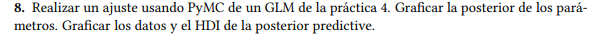

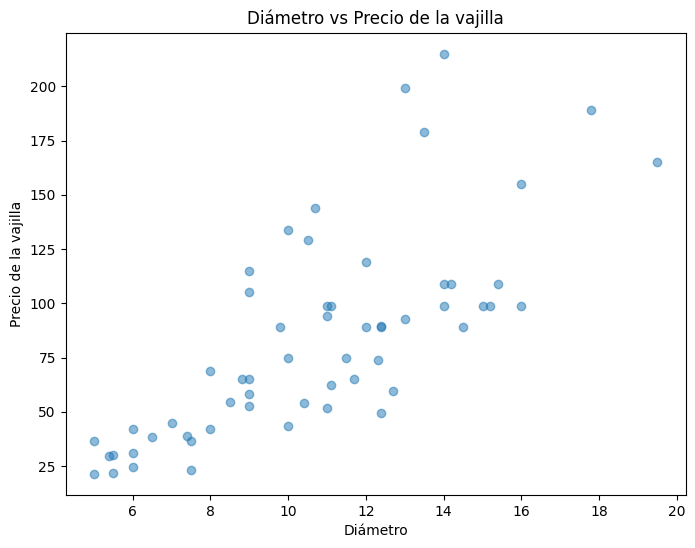

In [194]:
import pandas as pd

df_nambe = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/res/nambeware.csv")

df_nambe = df_nambe[df_nambe['Diam'] < 20]

plt.figure(figsize=(8, 6))
plt.scatter(df_nambe['Diam'], df_nambe['Price'], alpha=0.5)
plt.xlabel('Diámetro')
plt.ylabel('Precio de la vajilla')
plt.title('Diámetro vs Precio de la vajilla')
plt.show()

In [195]:
X = df_nambe['Diam'].values.flatten()
Y = df_nambe['Price'].values.flatten()

# Estandarizo a X para ayudar al algoritmo a converger más rápido
X_estandarizado = (X - np.mean(X)) / np.std(X)

with pm.Model() as modelo_nambe:

    # Defino distribuciones de los priors
    B0 = pm.Normal('B0', mu=0, sigma=10)
    B1 = pm.Normal('B1', mu=0, sigma=10)
    alpha = pm.HalfNormal('alpha', sigma=5)
    
    # Armo el mu
    mu = B0 + B1 * X_estandarizado
    
    # Defino la función de enlace
    func_enlace = np.exp(mu)

    # Armo la likelihood
    y_obs = pm.Gamma('y_obs', alpha=alpha, beta=alpha/func_enlace, observed=Y)

    # Obtengo la traza
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B0, B1, alpha]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


<Figure size 800x500 with 0 Axes>

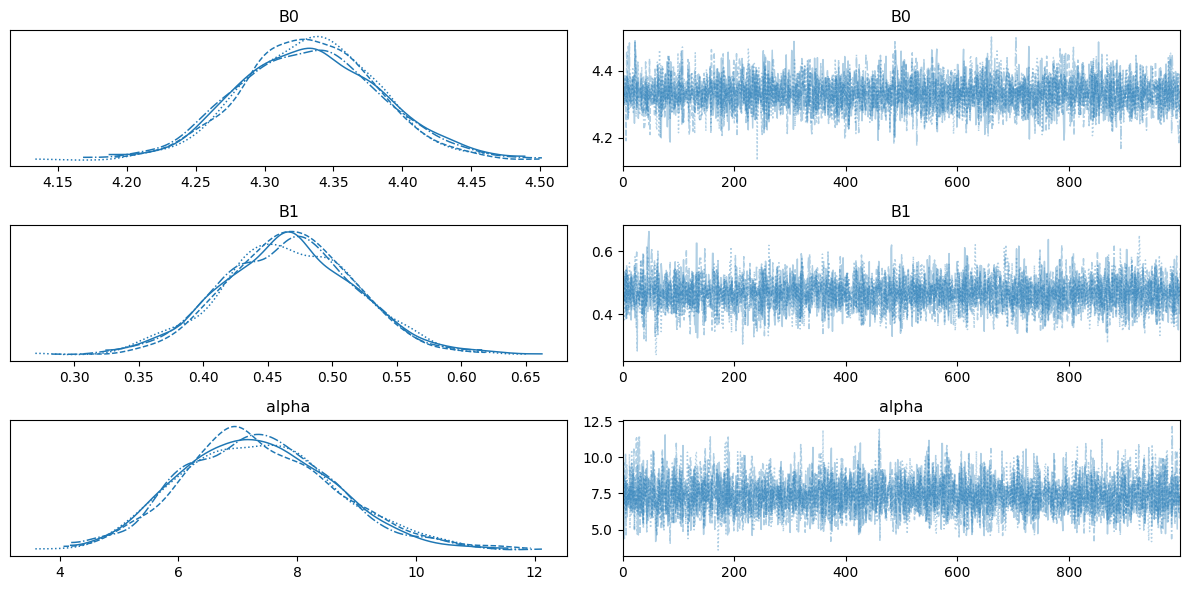

In [196]:
pm.summary(trace)

plt.figure(figsize=(8, 5))
pm.plot_trace(trace)
plt.tight_layout()
plt.show()

In [197]:
# Obtengo los samples de la posterior
b0_samples = trace.posterior['B0'].values.flatten()
b1_samples = trace.posterior['B1'].values.flatten()
alpha_samples = trace.posterior['alpha'].values.flatten()

# Armo la matriz de predicciones
x_pred_scaled = np.linspace(X_estandarizado.min(), X_estandarizado.max(), 100)
y_pred_samples = np.zeros((len(b0_samples), len(x_pred_scaled)))
y_obs_samples = np.zeros((len(b0_samples), len(x_pred_scaled)))

for i in range(len(b0_samples)):
    # mu = exp(β₀ + β₁x)
    y_pred_samples[i] = np.exp(b0_samples[i] + b1_samples[i] * x_pred_scaled)

    # y ∼ Gamma(alpha, μ/alpha)
    y_obs_samples[i] = stats.gamma.rvs(a=alpha_samples[i], scale=y_pred_samples[i]/alpha_samples[i], size=len(x_pred_scaled))


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6320\3080722831.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.9)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6320\3080722831.py:3: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_obs_hdi = az.hdi(y_obs_samples, hdi_prob=0.9)


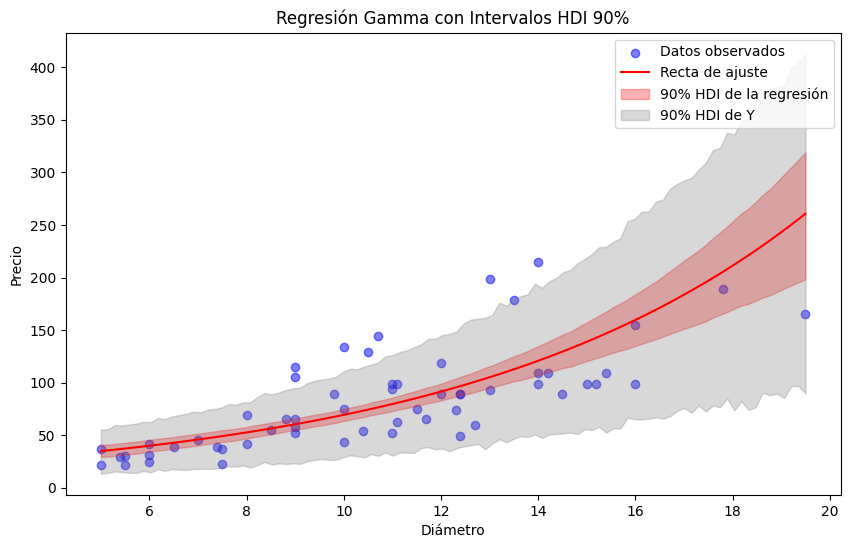

In [198]:
# Obtengo los 90% HDI para las predicciones y para los datos observados
y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.9)
y_obs_hdi = az.hdi(y_obs_samples, hdi_prob=0.9)

# Desestandarizo para el gráfico
x_pred = x_pred_scaled * X.std() + X.mean()

# Gráfico de resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label="Datos observados", color="blue")
plt.plot(x_pred, y_pred_samples.mean(axis=0), color="red", label="Recta de ajuste")

# 90% HDI de regresión y datos observados
plt.fill_between(x_pred, y_pred_hdi[:, 0], y_pred_hdi[:, 1], color="red", alpha=0.3, label="90% HDI de la regresión")
plt.fill_between(x_pred, y_obs_hdi[:, 0], y_obs_hdi[:, 1], color="gray", alpha=0.3, label="90% HDI de Y")

plt.xlabel("Diámetro")
plt.ylabel("Precio")
plt.title("Regresión Gamma con Intervalos HDI 90%")
plt.legend()
plt.show()

EJERCICIO CLASE

In [61]:
p = .3
n = 10

tirada = np.random.binomial(1,p,n)

In [62]:
# prior -> tengo que elegir la distribucion 
#likelihood -> al elegirla, elijo el modelo. O sea, elijo el modelo y de esa amnera elijo la likelihood

def binomial_likelihood(p,tirada):
    caras = np.sum(tirada)
    n = len(tirada)
    return stats.binom.pmf(caras, n, p)

p_estimada = np.linspace(0,1,1000)
likelihood = np.array([binomial_likelihood(p,tirada) for p in p_estimada])

Text(0.5, 1.0, 'con 10 datos')

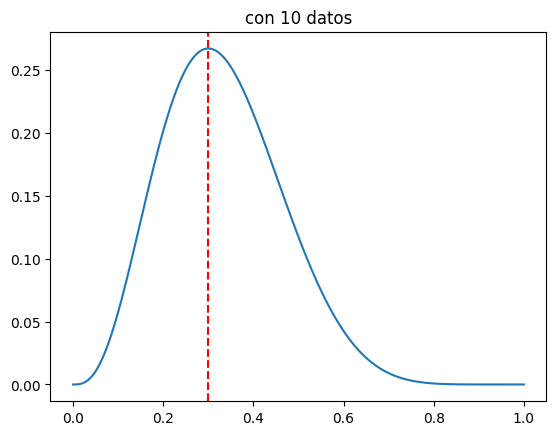

In [63]:
fig, ax = plt.subplots()
ax.plot(p_estimada, likelihood)
ax.axvline(x=sum(tirada)/ len(tirada), linestyle = '--', color = 'red')
ax.set_title(f"con {n} datos")

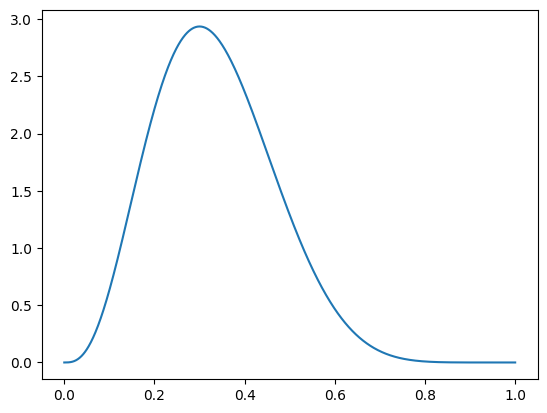

In [64]:
def uniform_prior(p):
    return 1

def posterior_raw(p, prior):
    return binomial_likelihood(p, tirada) * prior(p)

def posterior(p,prior):
    p_raw = posterior_raw(p,prior)
    return p_raw / const_norm

posterior_sin_norm = [posterior_raw(p, uniform_prior) for p in p_estimada]
const_norm = sum(posterior_sin_norm[1:] * np.diff(p_estimada))
posterior = [posterior(p,uniform_prior) for p in p_estimada]

fig, ax = plt.subplots()
ax.plot(p_estimada, posterior)

ahora con PYMC...

In [70]:
tiradas = np.random.binomial(1, .3, n *10)
positivos = sum(tiradas)
total = len(tiradas)

with pm.Model() as model:
    p = pm.Beta('p', alpha = 1, beta = 1)
    likelihood = pm.Binomial('lh', n = total,p=p, observed = positivos)
    trace = pm.sample(2000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


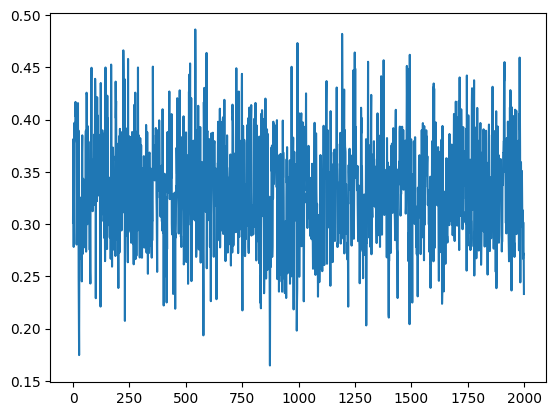

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  4.,  4.,  5.,  4.,  8.,  7.,  4.,  4.,  7.,  8.,
         9.,  9., 11.,  7., 16., 18., 24., 28., 34., 41., 33., 30., 43.,
        51., 37., 37., 59., 44., 48., 48., 50., 55., 48., 61., 50., 50.,
        63., 61., 48., 57., 57., 47., 58., 49., 41., 40., 41., 39., 30.,
        34., 30., 29., 38., 29., 20., 27., 21., 19., 13.,  7., 11.,  7.,
         9.,  9.,  4.,  8.,  7.,  2.,  7.,  3.,  4.,  2.,  9.,  3.,  3.,
         2.,  1.,  3.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([0.16478381, 0.16799956, 0.17121531, 0.17443107, 0.17764682,
        0.18086258, 0.18407833, 0.18729408, 0.19050984, 0.19372559,
        0.19694134, 0.2001571 , 0.20337285, 0.20658861, 0.20980436,
        0.21302011, 0.21623587, 0.21945162, 0.22266738, 0.22588313,
        0.22909888, 0.23231464, 0.23553039, 0.23874615, 0.2419619 ,
        0.24517765, 0.24839341, 0.25160916, 0.25482492, 0.25804067,
        0.26125642, 0.2644

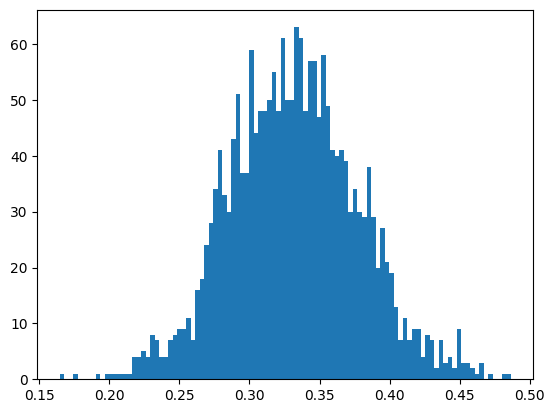

In [77]:
traza = trace.posterior.p.to_numpy()

fig,ax = plt.subplots()
ax.plot(traza[0,:])
plt.show()

plt.hist(traza[0,:], bins =100)

OTRO EJERCICIO DE CLASE

In [89]:
#EN TEORIA ESTO NO EXISTE, YO SOLO TENGO X y Y
m = 2.5   # Pendiente
B = 5     # Intercepto
n = 100  # Número de puntos

# Generación de los datos
np.random.seed(42)  # Para reproducibilidad
X = np.random.uniform(0, 10, n)  # Valores de X entre 0 y 10
ruido = np.random.normal(0, 1, n)  # Ruido normal con media 0 y desviación estándar 1
Y = m * X + B + ruido  # Relación lineal con ruido

# Convertir a arrays (esto ya es implícito en cómo los generamos)
X = np.array(X)
Y = np.array(Y)

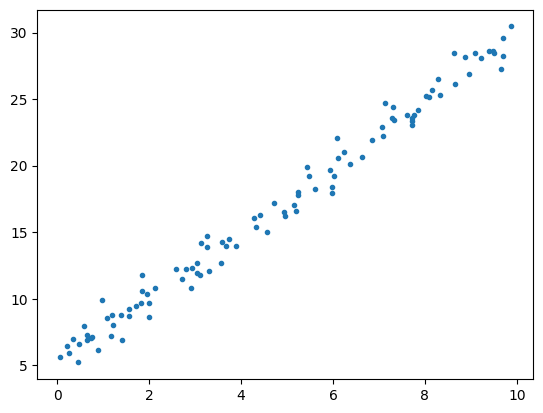

In [90]:
plt.plot(X,Y, '.')

In [91]:
with pm.Model() as linear_model:
    intercept = pm.Normal('intercept', mu = 0, sigma = 100) #sigma grande es la version no informativa de un prior normal
    slope = pm.Normal("slope", mu = 0, sigma = 100)
    sigma = pm.HalfNormal("sigma", sigma = 100)

    mu = intercept + slope * X
    likelihood = pm.Normal("lh", mu = mu, sigma = sigma, observed = Y)
    

In [92]:
with linear_model:
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 138 seconds.


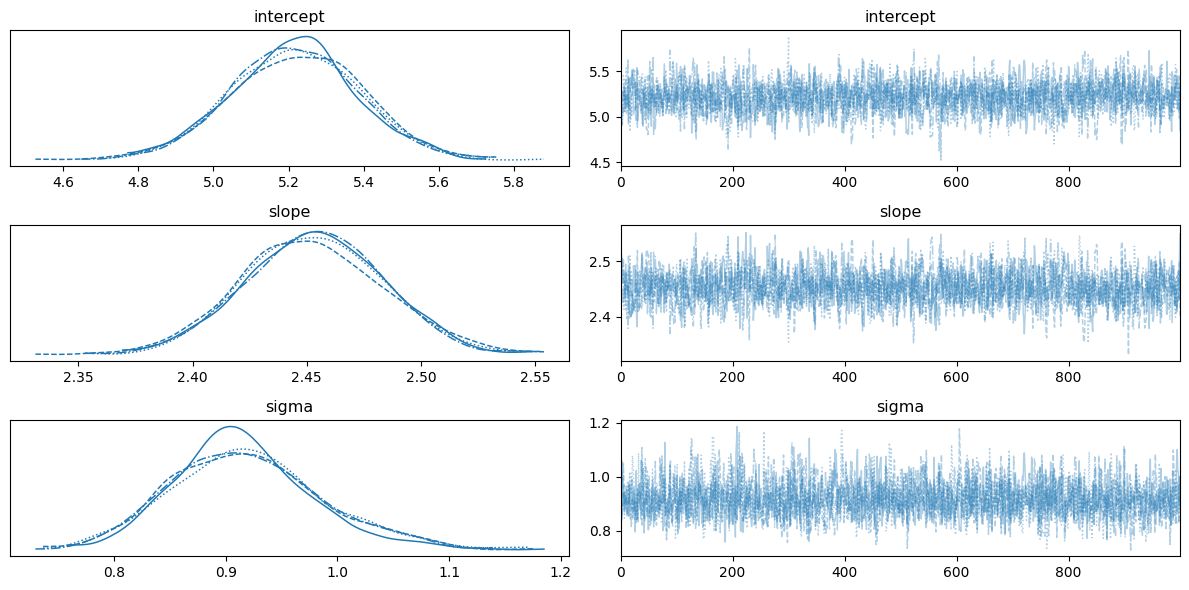

In [93]:
az.plot_trace(trace)
plt.tight_layout()

EJERCICIO MIELEROS CHILLONES

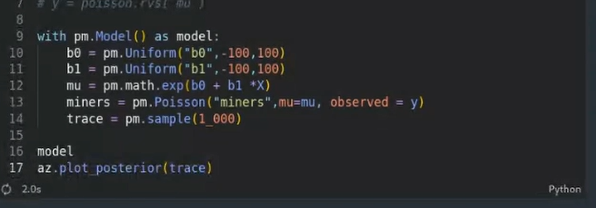

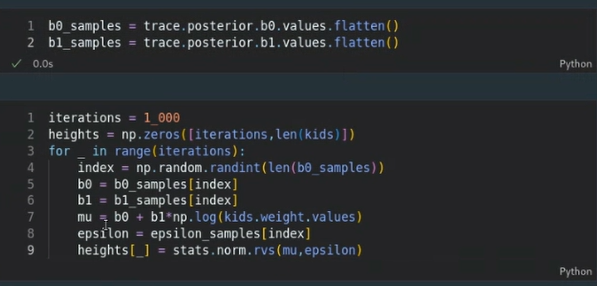

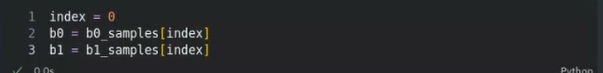

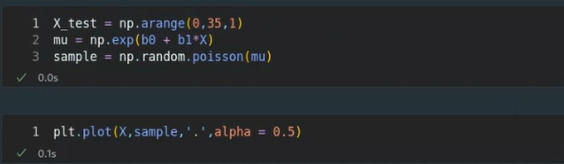

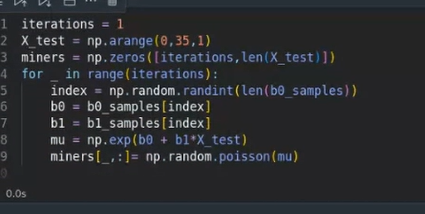

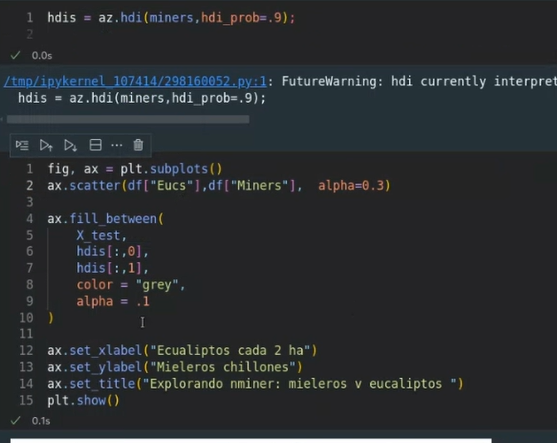

AGAIN

mODELO LINEAL CON PRIORS NO INFORMATIVOS 

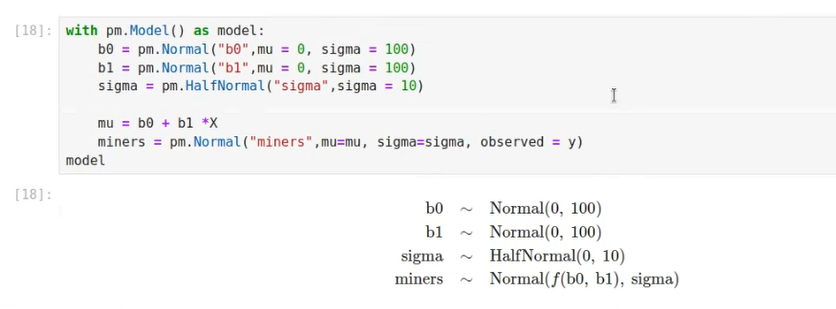

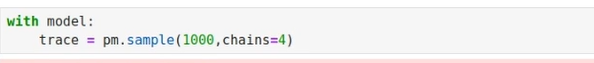

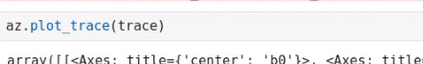

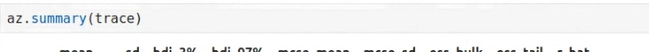

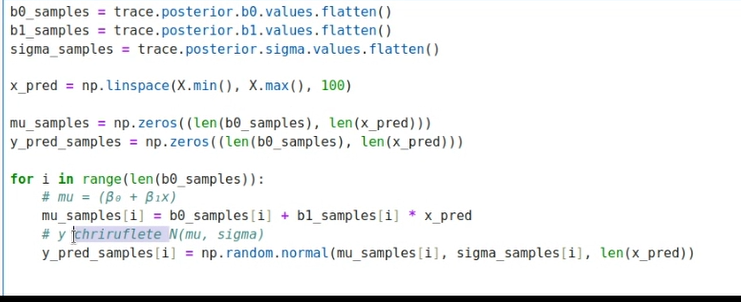

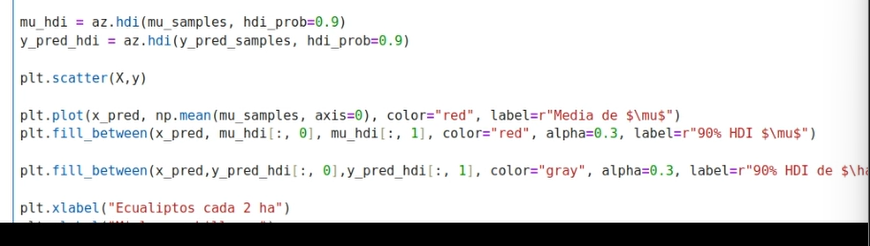

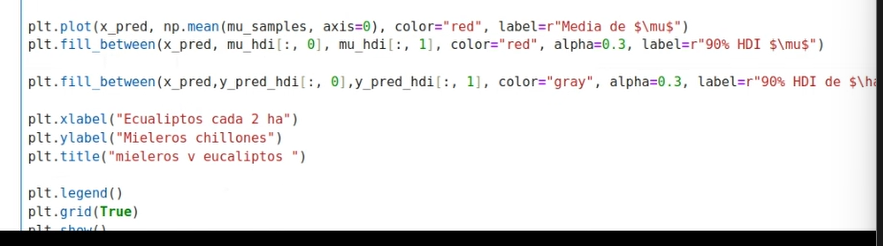

GLM CON PYMC
la lineal no siempre va, puedo aplicar la idea de las GLM.

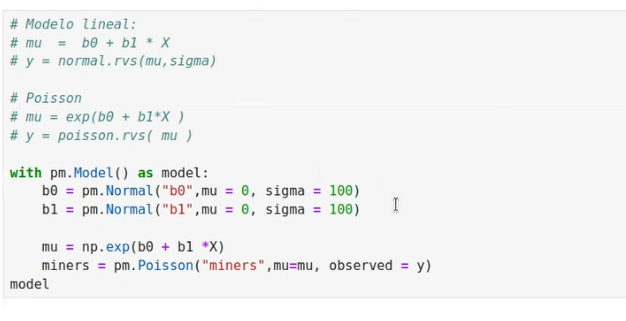

el resto del problema es igual

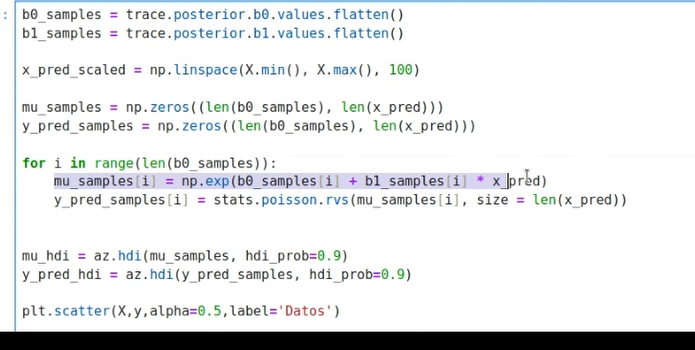

para una binomial como la del aprcial

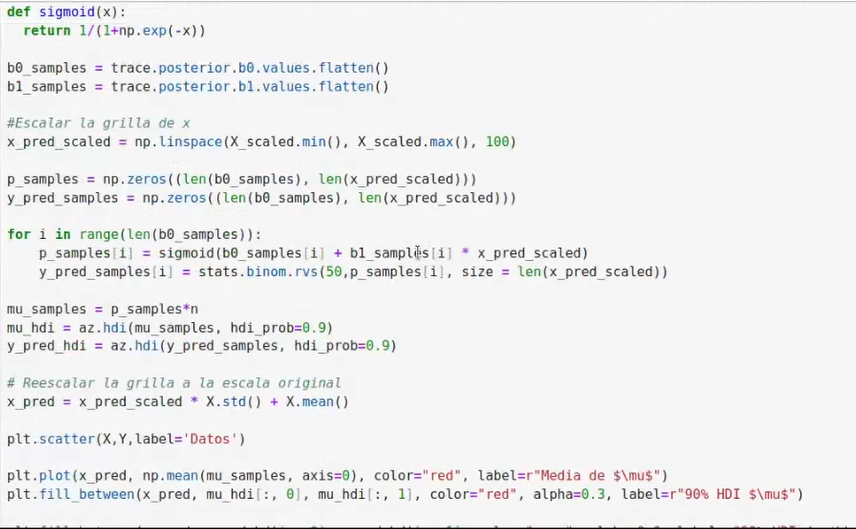

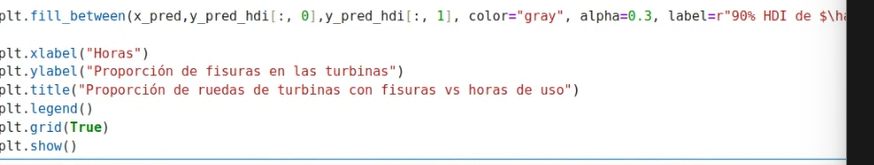